### Block 1: Importer les bibliothèques

In [2]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Block 2: Créer et visualiser les données initiales

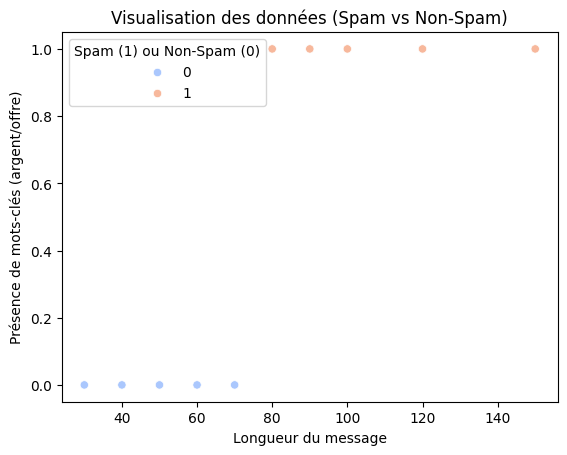

In [12]:
# Créer un jeu de données étendu avec plus d'exemples
# DataFrame avec les features (présence de certains mots, longueur du message) et la target (spam ou non)
data = {
    'presence_money_words': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],  # 1 = mots comme "argent", "offre" présents, 0 = absents
    'message_length': [100, 50, 80, 60, 150, 30, 70, 120, 90, 40],  # Longueur du message en caractères
    'is_spam': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]                      # 1 = spam, 0 = non-spam
}
df = pd.DataFrame(data)

# Visualiser les données initiales
sns.scatterplot(data=df, x='message_length', y='presence_money_words', hue='is_spam', palette='coolwarm')
plt.title('Visualisation des données (Spam vs Non-Spam)')
plt.xlabel('Longueur du message')
plt.ylabel('Présence de mots-clés (argent/offre)')
plt.legend(title='Spam (1) ou Non-Spam (0)')
plt.show()

### Block 3: Préparer les données pour le modèle

In [13]:
# Séparer les features (X) et la target (y)
X = df[['presence_money_words', 'message_length']]
y = df['is_spam']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Block 4: Entraîner le modèle

In [14]:
# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

LogisticRegression()

### Block 5: Évaluer le modèle

In [15]:
# Prédire les labels sur les données de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



### Block 6: Visualiser les prédictions

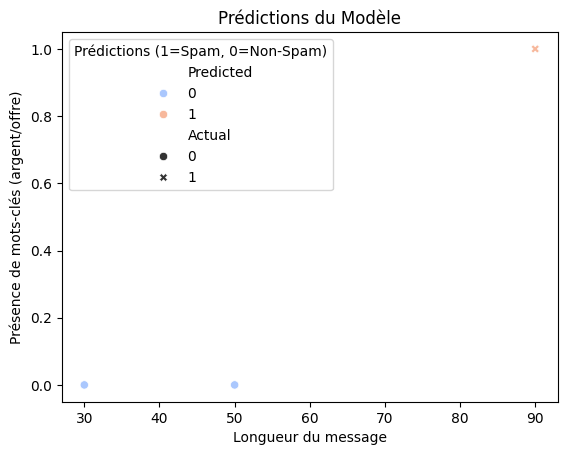

In [16]:
# Visualiser les données prédites
X_test['Predicted'] = y_pred
X_test['Actual'] = y_test.values
sns.scatterplot(data=X_test, x='message_length', y='presence_money_words', hue='Predicted', style='Actual', palette='coolwarm', markers={0: 'o', 1: 'X'})
plt.title('Prédictions du Modèle')
plt.xlabel('Longueur du message')
plt.ylabel('Présence de mots-clés (argent/offre)')
plt.legend(title='Prédictions (1=Spam, 0=Non-Spam)')
plt.show()

### Block 7: Prédire sur de nouvelles données

In [17]:
# Exemple de prédiction sur de nouvelles données
new_data = pd.DataFrame({
    'presence_money_words': [0, 1, 1, 0],
    'message_length': [70, 120, 200, 30]
})
predictions = model.predict(new_data)
new_data['Predicted'] = predictions
print("Predictions for new data:\n", new_data)

Predictions for new data:
    presence_money_words  message_length  Predicted
0                     0              70          0
1                     1             120          1
2                     1             200          1
3                     0              30          0


### Block 8: Visualiser les nouvelles prédictions

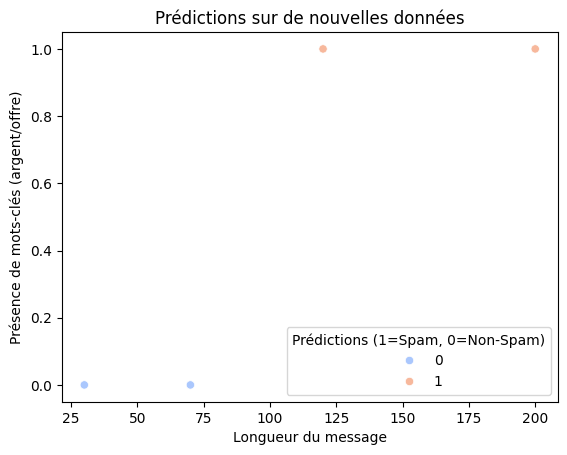

In [18]:
# Visualiser les prédictions sur les nouvelles données
sns.scatterplot(data=new_data, x='message_length', y='presence_money_words', hue='Predicted', palette='coolwarm', markers={0: 'o', 1: 'X'})
plt.title('Prédictions sur de nouvelles données')
plt.xlabel('Longueur du message')
plt.ylabel('Présence de mots-clés (argent/offre)')
plt.legend(title='Prédictions (1=Spam, 0=Non-Spam)')
plt.show()